In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
 
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression
from sklearn.kernel_ridge import KernelRidge

In [2]:
df=pd.read_csv('Energy_consumption.csv')
df1=pd.read_csv('base_station_basic_info.csv')
df2=pd.read_csv('Cell-level data.csv')

In [3]:
df.head()

Time   BS     Energy
0  1/1/2023 1:00  B_0  64.275037
1  1/1/2023 2:00  B_0  55.904335
2  1/1/2023 3:00  B_0  57.698057
3  1/1/2023 4:00  B_0  55.156951
4  1/1/2023 5:00  B_0  56.053812

In [4]:
df1.head()

BS CellName RUType   Mode  Frequency  Bandwidth  Antennas   TXpower
0  B_0    Cell0  Type1  Mode2      365.0         20         4  6.875934
1  B_1    Cell0  Type2  Mode2      532.0         20         4  6.875934
2  B_2    Cell0  Type1  Mode2      365.0         20         4  6.875934
3  B_3    Cell0  Type2  Mode2      532.0         20         4  6.875934
4  B_4    Cell0  Type2  Mode2      532.0         20         4  6.875934

In [5]:
df2.head()

Time   BS CellName      load  ESMode1  ESMode2  ESMode3  ESMode4  \
0  1/1/2023 1:00  B_0    Cell0  0.487936      0.0      0.0      0.0        0   
1  1/1/2023 2:00  B_0    Cell0  0.344468      0.0      0.0      0.0        0   
2  1/1/2023 3:00  B_0    Cell0  0.193766      0.0      0.0      0.0        0   
3  1/1/2023 4:00  B_0    Cell0  0.222383      0.0      0.0      0.0        0   
4  1/1/2023 5:00  B_0    Cell0  0.175436      0.0      0.0      0.0        0   

   ESMode5  ESMode6  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0

In [6]:
df1.head()

BS CellName RUType   Mode  Frequency  Bandwidth  Antennas   TXpower
0  B_0    Cell0  Type1  Mode2      365.0         20         4  6.875934
1  B_1    Cell0  Type2  Mode2      532.0         20         4  6.875934
2  B_2    Cell0  Type1  Mode2      365.0         20         4  6.875934
3  B_3    Cell0  Type2  Mode2      532.0         20         4  6.875934
4  B_4    Cell0  Type2  Mode2      532.0         20         4  6.875934

In [7]:
Merged_df=pd.merge(df2,df, on=['BS','Time'], how='inner') 
Merged_df

Time      BS CellName      load  ESMode1  ESMode2  ESMode3  \
0       1/1/2023 1:00     B_0    Cell0  0.487936      0.0      0.0      0.0   
1       1/1/2023 2:00     B_0    Cell0  0.344468      0.0      0.0      0.0   
2       1/1/2023 3:00     B_0    Cell0  0.193766      0.0      0.0      0.0   
3       1/1/2023 4:00     B_0    Cell0  0.222383      0.0      0.0      0.0   
4       1/1/2023 5:00     B_0    Cell0  0.175436      0.0      0.0      0.0   
...               ...     ...      ...       ...      ...      ...      ...   
98079  1/2/2023 17:00  B_1018    Cell0  0.087538      0.0      0.0      0.0   
98080  1/2/2023 18:00  B_1018    Cell0  0.082635      0.0      0.0      0.0   
98081  1/2/2023 21:00  B_1018    Cell0  0.055538      0.0      0.0      0.0   
98082  1/2/2023 22:00  B_1018    Cell0  0.058077      0.0      0.0      0.0   
98083  1/2/2023 23:00  B_1018    Cell0  0.048173      0.0      0.0      0.0   

       ESMode4  ESMode5   ESMode6     Energy  
0            0      0.0  0.000000  64.275037  
1            0      0.0  0.000000  55.904335  
2            0      0.0  0.000000  57.698057  
3            0      0.0  0.000000  55.156951  
4            0      0.0  0.000000  56.053812  
...        ...      ...       ...        ...  
98079        0      0.0  0.781566  14.648729  
98080        0      0.0  0.804310  14.648729  
98081        0      0.0  0.846935  13.452915  
98082        0      0.0  0.856434  13.602392  
98083        0      0.0  0.879232  13.303438  

[98084 rows x 11 columns]

In [8]:
data=pd.merge(Merged_df,df1, on=['BS','CellName'], how='inner') 

In [9]:
data.head()

Time   BS CellName      load  ESMode1  ESMode2  ESMode3  ESMode4  \
0  1/1/2023 1:00  B_0    Cell0  0.487936      0.0      0.0      0.0        0   
1  1/1/2023 2:00  B_0    Cell0  0.344468      0.0      0.0      0.0        0   
2  1/1/2023 3:00  B_0    Cell0  0.193766      0.0      0.0      0.0        0   
3  1/1/2023 4:00  B_0    Cell0  0.222383      0.0      0.0      0.0        0   
4  1/1/2023 5:00  B_0    Cell0  0.175436      0.0      0.0      0.0        0   

   ESMode5  ESMode6     Energy RUType   Mode  Frequency  Bandwidth  Antennas  \
0      0.0      0.0  64.275037  Type1  Mode2      365.0         20         4   
1      0.0      0.0  55.904335  Type1  Mode2      365.0         20         4   
2      0.0      0.0  57.698057  Type1  Mode2      365.0         20         4   
3      0.0      0.0  55.156951  Type1  Mode2      365.0         20         4   
4      0.0      0.0  56.053812  Type1  Mode2      365.0         20         4   

    TXpower  
0  6.875934  
1  6.875934  
2  6.875934  
3  6.875934  
4  6.875934

In [10]:
data.isnull().sum()

Time         0
BS           0
CellName     0
load         0
ESMode1      0
ESMode2      0
ESMode3      0
ESMode4      0
ESMode5      0
ESMode6      0
Energy       0
RUType       0
Mode         0
Frequency    0
Bandwidth    0
Antennas     0
TXpower      0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98084 entries, 0 to 98083
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       98084 non-null  object 
 1   BS         98084 non-null  object 
 2   CellName   98084 non-null  object 
 3   load       98084 non-null  float64
 4   ESMode1    98084 non-null  float64
 5   ESMode2    98084 non-null  float64
 6   ESMode3    98084 non-null  float64
 7   ESMode4    98084 non-null  int64  
 8   ESMode5    98084 non-null  float64
 9   ESMode6    98084 non-null  float64
 10  Energy     98084 non-null  float64
 11  RUType     98084 non-null  object 
 12  Mode       98084 non-null  object 
 13  Frequency  98084 non-null  float64
 14  Bandwidth  98084 non-null  int64  
 15  Antennas   98084 non-null  int64  
 16  TXpower    98084 non-null  float64
dtypes: float64(9), int64(3), object(5)
memory usage: 13.5+ MB


In [12]:
mode=data['Energy'].mode()[0]
mode

17.93721973

In [13]:
data.isna().sum()

Time         0
BS           0
CellName     0
load         0
ESMode1      0
ESMode2      0
ESMode3      0
ESMode4      0
ESMode5      0
ESMode6      0
Energy       0
RUType       0
Mode         0
Frequency    0
Bandwidth    0
Antennas     0
TXpower      0
dtype: int64

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(data.Energy, kde = True, bins = 15)
plt.title('Energy Consumption', y = 1.02, fontsize = 15)
display(plt.show(), data.Energy.skew())

None

1.0069574035004967

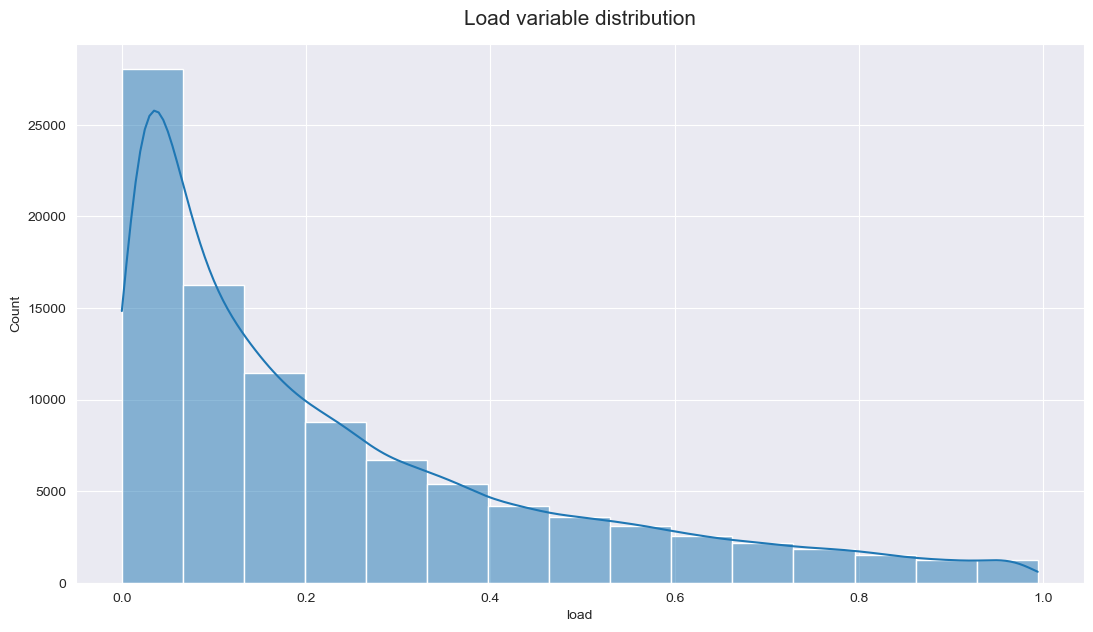

None

1.2306824286670044

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(data.load, kde = True, bins = 15)
plt.title('Load variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), data.load.skew())

In [16]:
sns.countplot(x=data.CellName)

<Axes: xlabel='CellName', ylabel='count'>

In [17]:
top20_corrs = abs(data.corr(numeric_only = True)).head(20)
top20_corrs

load   ESMode1   ESMode2   ESMode3  ESMode4   ESMode5  \
load       1.000000  0.199395  0.197044  0.003215      NaN  0.004226   
ESMode1    0.199395  1.000000  0.983995  0.007127      NaN  0.000924   
ESMode2    0.197044  0.983995  1.000000  0.006994      NaN  0.000906   
ESMode3    0.003215  0.007127  0.006994  1.000000      NaN  0.000155   
ESMode4         NaN       NaN       NaN       NaN      NaN       NaN   
ESMode5    0.004226  0.000924  0.000906  0.000155      NaN  1.000000   
ESMode6    0.118115  0.039910  0.041663  0.007012      NaN  0.000916   
Energy     0.594971  0.269606  0.267593  0.013684      NaN  0.004684   
Frequency  0.074309  0.257547  0.244546  0.005608      NaN  0.005378   
Bandwidth  0.266165  0.136718  0.146096  0.012386      NaN  0.003213   
Antennas   0.011319  0.044066  0.022223  0.010107      NaN  0.004007   
TXpower    0.090687  0.095990  0.065225  0.005939      NaN  0.002100   

            ESMode6    Energy  Frequency  Bandwidth  Antennas   TXpower  
load       0.118115  0.594971   0.074309   0.266165  0.011319  0.090687  
ESMode1    0.039910  0.269606   0.257547   0.136718  0.044066  0.095990  
ESMode2    0.041663  0.267593   0.244546   0.146096  0.022223  0.065225  
ESMode3    0.007012  0.013684   0.005608   0.012386  0.010107  0.005939  
ESMode4         NaN       NaN        NaN        NaN       NaN       NaN  
ESMode5    0.000916  0.004684   0.005378   0.003213  0.004007  0.002100  
ESMode6    1.000000  0.120975   0.112794   0.485522  0.106464  0.426460  
Energy     0.120975  1.000000   0.033196   0.160808  0.165551  0.309092  
Frequency  0.112794  0.033196   1.000000   0.601493  0.185527  0.626580  
Bandwidth  0.485522  0.160808   0.601493   1.000000  0.043478  0.264248  
Antennas   0.106464  0.165551   0.185527   0.043478  1.000000  0.327843  
TXpower    0.426460  0.309092   0.626580   0.264248  0.327843  1.000000

In [18]:
corr = data[list(top20_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [19]:
BS_enc=LabelEncoder()
data['BS']=BS_enc.fit_transform(data['BS'])

In [20]:
t_enc=LabelEncoder()
data['Time']=t_enc.fit_transform(data['Time'])

In [21]:
cn_enc=LabelEncoder()
data['CellName']=cn_enc.fit_transform(data['CellName'])

In [22]:
ru_enc=LabelEncoder()
data['RUType']=ru_enc.fit_transform(data['RUType'])

In [23]:
m_enc=LabelEncoder()
data['Mode']=m_enc.fit_transform(data['Mode'])

In [24]:
X=data.drop(columns=['BS','Energy'])
Y=data['Energy']

In [25]:
models = {
          'random forest':RandomForestRegressor(random_state = 42),
          'gradient boosting': GradientBoostingRegressor(random_state = 42),
          'XGB':XGBRegressor(random_state = 42),
          'CatBoost': CatBoostRegressor(random_seed = 42, ),
          'lasso regression': Lasso(random_state = 42),
          'Bayesian Ridge': BayesianRidge()
          }

In [26]:
def cross_val_models(models, X, Y):
    
    cv_scores = [] #A list to store the mean performance of each model
    
    for name, model in models.items():
        cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2', ).mean()
        cv_scores.append(cv_score)

    score_df = pd.DataFrame([cv_scores], columns = list(models.keys())).transpose()
    score_df.rename(columns = {0:'CV_Score'}, inplace = True)

    return score_df.sort_values(by = 'CV_Score', ascending = False)

In [27]:
score_df = cross_val_models(models, X, Y)

Learning rate set to 0.081572
0:	learn: 13.1272727	total: 228ms	remaining: 3m 48s
1:	learn: 12.3012366	total: 265ms	remaining: 2m 12s
2:	learn: 11.5359649	total: 302ms	remaining: 1m 40s
3:	learn: 10.8377701	total: 323ms	remaining: 1m 20s
4:	learn: 10.1967137	total: 338ms	remaining: 1m 7s
5:	learn: 9.6135787	total: 351ms	remaining: 58.1s
6:	learn: 9.0784120	total: 363ms	remaining: 51.5s
7:	learn: 8.6063527	total: 376ms	remaining: 46.6s
8:	learn: 8.1854272	total: 388ms	remaining: 42.8s
9:	learn: 7.8027393	total: 401ms	remaining: 39.7s
10:	learn: 7.4514118	total: 414ms	remaining: 37.2s
11:	learn: 7.1295653	total: 427ms	remaining: 35.1s
12:	learn: 6.8459159	total: 441ms	remaining: 33.5s
13:	learn: 6.6036821	total: 455ms	remaining: 32s
14:	learn: 6.3675544	total: 468ms	remaining: 30.7s
15:	learn: 6.1554762	total: 482ms	remaining: 29.6s
16:	learn: 5.9679419	total: 496ms	remaining: 28.7s
17:	learn: 5.8057708	total: 509ms	remaining: 27.8s
18:	learn: 5.6605766	total: 522ms	remaining: 27s
19:	le

173:	learn: 4.0927770	total: 2.61s	remaining: 12.4s
174:	learn: 4.0900108	total: 2.62s	remaining: 12.4s
175:	learn: 4.0880345	total: 2.64s	remaining: 12.4s
176:	learn: 4.0865575	total: 2.65s	remaining: 12.3s
177:	learn: 4.0849285	total: 2.67s	remaining: 12.3s
178:	learn: 4.0843751	total: 2.68s	remaining: 12.3s
179:	learn: 4.0821378	total: 2.69s	remaining: 12.3s
180:	learn: 4.0798408	total: 2.71s	remaining: 12.3s
181:	learn: 4.0793132	total: 2.72s	remaining: 12.2s
182:	learn: 4.0788378	total: 2.73s	remaining: 12.2s
183:	learn: 4.0771290	total: 2.75s	remaining: 12.2s
184:	learn: 4.0750079	total: 2.76s	remaining: 12.2s
185:	learn: 4.0733276	total: 2.78s	remaining: 12.2s
186:	learn: 4.0718962	total: 2.79s	remaining: 12.1s
187:	learn: 4.0710578	total: 2.8s	remaining: 12.1s
188:	learn: 4.0693473	total: 2.82s	remaining: 12.1s
189:	learn: 4.0678139	total: 2.83s	remaining: 12.1s
190:	learn: 4.0672258	total: 2.85s	remaining: 12.1s
191:	learn: 4.0662929	total: 2.86s	remaining: 12s
192:	learn: 4.0

340:	learn: 3.9408544	total: 4.99s	remaining: 9.65s
341:	learn: 3.9403461	total: 5s	remaining: 9.63s
342:	learn: 3.9400162	total: 5.02s	remaining: 9.61s
343:	learn: 3.9395514	total: 5.03s	remaining: 9.6s
344:	learn: 3.9390086	total: 5.04s	remaining: 9.58s
345:	learn: 3.9381670	total: 5.06s	remaining: 9.57s
346:	learn: 3.9371921	total: 5.08s	remaining: 9.55s
347:	learn: 3.9369294	total: 5.09s	remaining: 9.54s
348:	learn: 3.9365156	total: 5.1s	remaining: 9.52s
349:	learn: 3.9364399	total: 5.11s	remaining: 9.5s
350:	learn: 3.9363404	total: 5.13s	remaining: 9.48s
351:	learn: 3.9355132	total: 5.14s	remaining: 9.46s
352:	learn: 3.9348067	total: 5.15s	remaining: 9.45s
353:	learn: 3.9340805	total: 5.17s	remaining: 9.43s
354:	learn: 3.9333197	total: 5.18s	remaining: 9.42s
355:	learn: 3.9326601	total: 5.2s	remaining: 9.4s
356:	learn: 3.9322790	total: 5.21s	remaining: 9.39s
357:	learn: 3.9317429	total: 5.23s	remaining: 9.38s
358:	learn: 3.9313561	total: 5.24s	remaining: 9.36s
359:	learn: 3.931208

501:	learn: 3.8746342	total: 7.2s	remaining: 7.14s
502:	learn: 3.8744936	total: 7.21s	remaining: 7.13s
503:	learn: 3.8743629	total: 7.23s	remaining: 7.11s
504:	learn: 3.8739892	total: 7.24s	remaining: 7.1s
505:	learn: 3.8737499	total: 7.25s	remaining: 7.08s
506:	learn: 3.8734836	total: 7.27s	remaining: 7.07s
507:	learn: 3.8732418	total: 7.28s	remaining: 7.05s
508:	learn: 3.8727327	total: 7.29s	remaining: 7.04s
509:	learn: 3.8722727	total: 7.31s	remaining: 7.02s
510:	learn: 3.8720201	total: 7.32s	remaining: 7.01s
511:	learn: 3.8718214	total: 7.33s	remaining: 6.99s
512:	learn: 3.8714252	total: 7.35s	remaining: 6.98s
513:	learn: 3.8709027	total: 7.36s	remaining: 6.96s
514:	learn: 3.8706840	total: 7.38s	remaining: 6.95s
515:	learn: 3.8700730	total: 7.39s	remaining: 6.93s
516:	learn: 3.8692778	total: 7.41s	remaining: 6.92s
517:	learn: 3.8689583	total: 7.42s	remaining: 6.91s
518:	learn: 3.8684892	total: 7.43s	remaining: 6.89s
519:	learn: 3.8681705	total: 7.45s	remaining: 6.88s
520:	learn: 3.

664:	learn: 3.8299645	total: 9.43s	remaining: 4.75s
665:	learn: 3.8296828	total: 9.45s	remaining: 4.74s
666:	learn: 3.8295240	total: 9.46s	remaining: 4.72s
667:	learn: 3.8291810	total: 9.47s	remaining: 4.71s
668:	learn: 3.8290151	total: 9.49s	remaining: 4.69s
669:	learn: 3.8289022	total: 9.5s	remaining: 4.68s
670:	learn: 3.8286932	total: 9.52s	remaining: 4.67s
671:	learn: 3.8283007	total: 9.54s	remaining: 4.66s
672:	learn: 3.8279872	total: 9.56s	remaining: 4.65s
673:	learn: 3.8275595	total: 9.58s	remaining: 4.63s
674:	learn: 3.8274036	total: 9.6s	remaining: 4.62s
675:	learn: 3.8272340	total: 9.62s	remaining: 4.61s
676:	learn: 3.8270396	total: 9.63s	remaining: 4.59s
677:	learn: 3.8269108	total: 9.64s	remaining: 4.58s
678:	learn: 3.8263237	total: 9.67s	remaining: 4.57s
679:	learn: 3.8260521	total: 9.69s	remaining: 4.56s
680:	learn: 3.8256399	total: 9.71s	remaining: 4.55s
681:	learn: 3.8254990	total: 9.73s	remaining: 4.54s
682:	learn: 3.8253941	total: 9.75s	remaining: 4.52s
683:	learn: 3.

833:	learn: 3.7955122	total: 11.9s	remaining: 2.36s
834:	learn: 3.7951456	total: 11.9s	remaining: 2.35s
835:	learn: 3.7948157	total: 11.9s	remaining: 2.33s
836:	learn: 3.7946077	total: 11.9s	remaining: 2.32s
837:	learn: 3.7945228	total: 11.9s	remaining: 2.31s
838:	learn: 3.7943978	total: 12s	remaining: 2.29s
839:	learn: 3.7942853	total: 12s	remaining: 2.28s
840:	learn: 3.7940340	total: 12s	remaining: 2.27s
841:	learn: 3.7937778	total: 12s	remaining: 2.25s
842:	learn: 3.7936156	total: 12s	remaining: 2.24s
843:	learn: 3.7935247	total: 12s	remaining: 2.22s
844:	learn: 3.7933321	total: 12s	remaining: 2.21s
845:	learn: 3.7932034	total: 12.1s	remaining: 2.19s
846:	learn: 3.7929505	total: 12.1s	remaining: 2.18s
847:	learn: 3.7928032	total: 12.1s	remaining: 2.16s
848:	learn: 3.7927038	total: 12.1s	remaining: 2.15s
849:	learn: 3.7924290	total: 12.1s	remaining: 2.14s
850:	learn: 3.7922208	total: 12.1s	remaining: 2.12s
851:	learn: 3.7919958	total: 12.1s	remaining: 2.11s
852:	learn: 3.7918683	tota

Learning rate set to 0.081572
0:	learn: 13.6273472	total: 14.5ms	remaining: 14.5s
1:	learn: 12.7504220	total: 27.9ms	remaining: 13.9s
2:	learn: 11.9521513	total: 41.9ms	remaining: 13.9s
3:	learn: 11.2340447	total: 55.7ms	remaining: 13.9s
4:	learn: 10.5802397	total: 69.6ms	remaining: 13.9s
5:	learn: 9.9865666	total: 82.7ms	remaining: 13.7s
6:	learn: 9.4497501	total: 96ms	remaining: 13.6s
7:	learn: 8.9900023	total: 110ms	remaining: 13.6s
8:	learn: 8.5249678	total: 123ms	remaining: 13.6s
9:	learn: 8.1206268	total: 136ms	remaining: 13.5s
10:	learn: 7.7573793	total: 150ms	remaining: 13.5s
11:	learn: 7.4270384	total: 164ms	remaining: 13.5s
12:	learn: 7.1364506	total: 179ms	remaining: 13.6s
13:	learn: 6.8675640	total: 193ms	remaining: 13.6s
14:	learn: 6.6380347	total: 207ms	remaining: 13.6s
15:	learn: 6.4155162	total: 221ms	remaining: 13.6s
16:	learn: 6.2304456	total: 235ms	remaining: 13.6s
17:	learn: 6.0646091	total: 248ms	remaining: 13.5s
18:	learn: 5.9127740	total: 262ms	remaining: 13.5s
1

172:	learn: 4.2593346	total: 2.37s	remaining: 11.3s
173:	learn: 4.2587055	total: 2.39s	remaining: 11.3s
174:	learn: 4.2575408	total: 2.4s	remaining: 11.3s
175:	learn: 4.2558542	total: 2.42s	remaining: 11.3s
176:	learn: 4.2542278	total: 2.43s	remaining: 11.3s
177:	learn: 4.2526659	total: 2.44s	remaining: 11.3s
178:	learn: 4.2510576	total: 2.45s	remaining: 11.3s
179:	learn: 4.2502755	total: 2.47s	remaining: 11.2s
180:	learn: 4.2495605	total: 2.48s	remaining: 11.2s
181:	learn: 4.2465196	total: 2.49s	remaining: 11.2s
182:	learn: 4.2440013	total: 2.51s	remaining: 11.2s
183:	learn: 4.2431082	total: 2.52s	remaining: 11.2s
184:	learn: 4.2416655	total: 2.54s	remaining: 11.2s
185:	learn: 4.2406007	total: 2.55s	remaining: 11.2s
186:	learn: 4.2383148	total: 2.56s	remaining: 11.1s
187:	learn: 4.2373548	total: 2.58s	remaining: 11.1s
188:	learn: 4.2359290	total: 2.59s	remaining: 11.1s
189:	learn: 4.2337975	total: 2.61s	remaining: 11.1s
190:	learn: 4.2310187	total: 2.62s	remaining: 11.1s
191:	learn: 4

333:	learn: 4.1132540	total: 4.57s	remaining: 9.11s
334:	learn: 4.1128502	total: 4.58s	remaining: 9.1s
335:	learn: 4.1124499	total: 4.6s	remaining: 9.08s
336:	learn: 4.1121913	total: 4.61s	remaining: 9.07s
337:	learn: 4.1112756	total: 4.62s	remaining: 9.05s
338:	learn: 4.1108710	total: 4.64s	remaining: 9.04s
339:	learn: 4.1106163	total: 4.65s	remaining: 9.02s
340:	learn: 4.1102037	total: 4.66s	remaining: 9.01s
341:	learn: 4.1097180	total: 4.68s	remaining: 9s
342:	learn: 4.1093523	total: 4.69s	remaining: 8.98s
343:	learn: 4.1086769	total: 4.7s	remaining: 8.97s
344:	learn: 4.1076245	total: 4.72s	remaining: 8.96s
345:	learn: 4.1069427	total: 4.73s	remaining: 8.94s
346:	learn: 4.1067232	total: 4.74s	remaining: 8.93s
347:	learn: 4.1063961	total: 4.76s	remaining: 8.91s
348:	learn: 4.1057780	total: 4.77s	remaining: 8.9s
349:	learn: 4.1054790	total: 4.78s	remaining: 8.88s
350:	learn: 4.1052045	total: 4.8s	remaining: 8.87s
351:	learn: 4.1049830	total: 4.81s	remaining: 8.85s
352:	learn: 4.104763

503:	learn: 4.0392007	total: 6.93s	remaining: 6.82s
504:	learn: 4.0389581	total: 6.95s	remaining: 6.81s
505:	learn: 4.0385398	total: 6.96s	remaining: 6.8s
506:	learn: 4.0382473	total: 6.97s	remaining: 6.78s
507:	learn: 4.0380602	total: 6.99s	remaining: 6.77s
508:	learn: 4.0374045	total: 7s	remaining: 6.75s
509:	learn: 4.0372614	total: 7.01s	remaining: 6.74s
510:	learn: 4.0370344	total: 7.03s	remaining: 6.73s
511:	learn: 4.0367774	total: 7.04s	remaining: 6.71s
512:	learn: 4.0363287	total: 7.06s	remaining: 6.7s
513:	learn: 4.0360671	total: 7.07s	remaining: 6.68s
514:	learn: 4.0359495	total: 7.08s	remaining: 6.67s
515:	learn: 4.0354111	total: 7.1s	remaining: 6.66s
516:	learn: 4.0350569	total: 7.11s	remaining: 6.64s
517:	learn: 4.0346984	total: 7.12s	remaining: 6.63s
518:	learn: 4.0344858	total: 7.14s	remaining: 6.61s
519:	learn: 4.0342338	total: 7.15s	remaining: 6.6s
520:	learn: 4.0340643	total: 7.16s	remaining: 6.58s
521:	learn: 4.0337562	total: 7.18s	remaining: 6.57s
522:	learn: 4.03357

663:	learn: 3.9961731	total: 9.12s	remaining: 4.61s
664:	learn: 3.9959817	total: 9.13s	remaining: 4.6s
665:	learn: 3.9957358	total: 9.14s	remaining: 4.59s
666:	learn: 3.9955315	total: 9.16s	remaining: 4.57s
667:	learn: 3.9953499	total: 9.17s	remaining: 4.56s
668:	learn: 3.9949580	total: 9.19s	remaining: 4.54s
669:	learn: 3.9947692	total: 9.2s	remaining: 4.53s
670:	learn: 3.9944900	total: 9.21s	remaining: 4.52s
671:	learn: 3.9942107	total: 9.23s	remaining: 4.5s
672:	learn: 3.9939114	total: 9.24s	remaining: 4.49s
673:	learn: 3.9937804	total: 9.25s	remaining: 4.48s
674:	learn: 3.9935309	total: 9.27s	remaining: 4.46s
675:	learn: 3.9933501	total: 9.28s	remaining: 4.45s
676:	learn: 3.9932666	total: 9.29s	remaining: 4.43s
677:	learn: 3.9931020	total: 9.31s	remaining: 4.42s
678:	learn: 3.9928221	total: 9.32s	remaining: 4.41s
679:	learn: 3.9926488	total: 9.34s	remaining: 4.39s
680:	learn: 3.9922602	total: 9.35s	remaining: 4.38s
681:	learn: 3.9917522	total: 9.36s	remaining: 4.37s
682:	learn: 3.9

822:	learn: 3.9647139	total: 11.3s	remaining: 2.43s
823:	learn: 3.9644331	total: 11.3s	remaining: 2.42s
824:	learn: 3.9642503	total: 11.3s	remaining: 2.41s
825:	learn: 3.9641316	total: 11.4s	remaining: 2.39s
826:	learn: 3.9639482	total: 11.4s	remaining: 2.38s
827:	learn: 3.9638656	total: 11.4s	remaining: 2.36s
828:	learn: 3.9636142	total: 11.4s	remaining: 2.35s
829:	learn: 3.9633045	total: 11.4s	remaining: 2.34s
830:	learn: 3.9632420	total: 11.4s	remaining: 2.32s
831:	learn: 3.9630952	total: 11.4s	remaining: 2.31s
832:	learn: 3.9629661	total: 11.4s	remaining: 2.29s
833:	learn: 3.9628081	total: 11.5s	remaining: 2.28s
834:	learn: 3.9626956	total: 11.5s	remaining: 2.27s
835:	learn: 3.9626076	total: 11.5s	remaining: 2.25s
836:	learn: 3.9623971	total: 11.5s	remaining: 2.24s
837:	learn: 3.9621777	total: 11.5s	remaining: 2.23s
838:	learn: 3.9617758	total: 11.5s	remaining: 2.21s
839:	learn: 3.9616049	total: 11.5s	remaining: 2.2s
840:	learn: 3.9614484	total: 11.6s	remaining: 2.19s
841:	learn: 3

988:	learn: 3.9374033	total: 13.5s	remaining: 151ms
989:	learn: 3.9373214	total: 13.5s	remaining: 137ms
990:	learn: 3.9370236	total: 13.6s	remaining: 123ms
991:	learn: 3.9369363	total: 13.6s	remaining: 109ms
992:	learn: 3.9368063	total: 13.6s	remaining: 95.8ms
993:	learn: 3.9366193	total: 13.6s	remaining: 82.1ms
994:	learn: 3.9364549	total: 13.6s	remaining: 68.4ms
995:	learn: 3.9363030	total: 13.6s	remaining: 54.7ms
996:	learn: 3.9362207	total: 13.6s	remaining: 41ms
997:	learn: 3.9360395	total: 13.7s	remaining: 27.4ms
998:	learn: 3.9358239	total: 13.7s	remaining: 13.7ms
999:	learn: 3.9356013	total: 13.7s	remaining: 0us
Learning rate set to 0.081572
0:	learn: 13.1004211	total: 22.8ms	remaining: 22.7s
1:	learn: 12.2499395	total: 37ms	remaining: 18.5s
2:	learn: 11.4803546	total: 50.7ms	remaining: 16.8s
3:	learn: 10.7883407	total: 63.5ms	remaining: 15.8s
4:	learn: 10.1516751	total: 77ms	remaining: 15.3s
5:	learn: 9.5795863	total: 90.7ms	remaining: 15s
6:	learn: 9.0625763	total: 104ms	remai

156:	learn: 4.2053430	total: 2.17s	remaining: 11.7s
157:	learn: 4.2034190	total: 2.19s	remaining: 11.7s
158:	learn: 4.1993699	total: 2.2s	remaining: 11.6s
159:	learn: 4.1985921	total: 2.21s	remaining: 11.6s
160:	learn: 4.1973598	total: 2.23s	remaining: 11.6s
161:	learn: 4.1965253	total: 2.24s	remaining: 11.6s
162:	learn: 4.1954623	total: 2.25s	remaining: 11.6s
163:	learn: 4.1933400	total: 2.27s	remaining: 11.6s
164:	learn: 4.1911746	total: 2.28s	remaining: 11.5s
165:	learn: 4.1875793	total: 2.29s	remaining: 11.5s
166:	learn: 4.1846809	total: 2.31s	remaining: 11.5s
167:	learn: 4.1837097	total: 2.32s	remaining: 11.5s
168:	learn: 4.1824806	total: 2.33s	remaining: 11.5s
169:	learn: 4.1795345	total: 2.35s	remaining: 11.5s
170:	learn: 4.1783785	total: 2.36s	remaining: 11.5s
171:	learn: 4.1774961	total: 2.38s	remaining: 11.4s
172:	learn: 4.1768103	total: 2.39s	remaining: 11.4s
173:	learn: 4.1743923	total: 2.4s	remaining: 11.4s
174:	learn: 4.1733345	total: 2.42s	remaining: 11.4s
175:	learn: 4.

318:	learn: 4.0316078	total: 4.38s	remaining: 9.34s
319:	learn: 4.0306535	total: 4.39s	remaining: 9.33s
320:	learn: 4.0302925	total: 4.4s	remaining: 9.31s
321:	learn: 4.0300318	total: 4.41s	remaining: 9.3s
322:	learn: 4.0291916	total: 4.43s	remaining: 9.28s
323:	learn: 4.0281457	total: 4.44s	remaining: 9.27s
324:	learn: 4.0277204	total: 4.46s	remaining: 9.25s
325:	learn: 4.0274115	total: 4.47s	remaining: 9.24s
326:	learn: 4.0265779	total: 4.48s	remaining: 9.23s
327:	learn: 4.0250958	total: 4.5s	remaining: 9.22s
328:	learn: 4.0248699	total: 4.51s	remaining: 9.2s
329:	learn: 4.0244379	total: 4.52s	remaining: 9.18s
330:	learn: 4.0238518	total: 4.54s	remaining: 9.17s
331:	learn: 4.0231016	total: 4.55s	remaining: 9.16s
332:	learn: 4.0228202	total: 4.56s	remaining: 9.14s
333:	learn: 4.0220399	total: 4.58s	remaining: 9.13s
334:	learn: 4.0213275	total: 4.59s	remaining: 9.12s
335:	learn: 4.0204211	total: 4.61s	remaining: 9.1s
336:	learn: 4.0194773	total: 4.62s	remaining: 9.09s
337:	learn: 4.019

491:	learn: 3.9520010	total: 6.79s	remaining: 7s
492:	learn: 3.9514474	total: 6.8s	remaining: 6.99s
493:	learn: 3.9504724	total: 6.81s	remaining: 6.98s
494:	learn: 3.9501727	total: 6.83s	remaining: 6.96s
495:	learn: 3.9496576	total: 6.84s	remaining: 6.95s
496:	learn: 3.9492321	total: 6.86s	remaining: 6.94s
497:	learn: 3.9486021	total: 6.87s	remaining: 6.92s
498:	learn: 3.9483980	total: 6.88s	remaining: 6.91s
499:	learn: 3.9480175	total: 6.9s	remaining: 6.9s
500:	learn: 3.9479736	total: 6.91s	remaining: 6.88s
501:	learn: 3.9476906	total: 6.92s	remaining: 6.87s
502:	learn: 3.9473827	total: 6.94s	remaining: 6.85s
503:	learn: 3.9472717	total: 6.95s	remaining: 6.84s
504:	learn: 3.9470832	total: 6.96s	remaining: 6.82s
505:	learn: 3.9468120	total: 6.98s	remaining: 6.81s
506:	learn: 3.9464256	total: 6.99s	remaining: 6.8s
507:	learn: 3.9461520	total: 7s	remaining: 6.78s
508:	learn: 3.9458616	total: 7.02s	remaining: 6.77s
509:	learn: 3.9456502	total: 7.03s	remaining: 6.75s
510:	learn: 3.9450127	

651:	learn: 3.9042497	total: 8.93s	remaining: 4.77s
652:	learn: 3.9040761	total: 8.95s	remaining: 4.75s
653:	learn: 3.9039023	total: 8.96s	remaining: 4.74s
654:	learn: 3.9036554	total: 8.97s	remaining: 4.72s
655:	learn: 3.9034679	total: 8.98s	remaining: 4.71s
656:	learn: 3.9033593	total: 8.99s	remaining: 4.7s
657:	learn: 3.9032128	total: 9.01s	remaining: 4.68s
658:	learn: 3.9031050	total: 9.02s	remaining: 4.67s
659:	learn: 3.9029976	total: 9.03s	remaining: 4.65s
660:	learn: 3.9027394	total: 9.05s	remaining: 4.64s
661:	learn: 3.9026269	total: 9.06s	remaining: 4.63s
662:	learn: 3.9024638	total: 9.07s	remaining: 4.61s
663:	learn: 3.9023602	total: 9.09s	remaining: 4.6s
664:	learn: 3.9022022	total: 9.1s	remaining: 4.58s
665:	learn: 3.9020234	total: 9.11s	remaining: 4.57s
666:	learn: 3.9018710	total: 9.12s	remaining: 4.55s
667:	learn: 3.9014440	total: 9.14s	remaining: 4.54s
668:	learn: 3.9012658	total: 9.15s	remaining: 4.53s
669:	learn: 3.9010041	total: 9.17s	remaining: 4.51s
670:	learn: 3.9

812:	learn: 3.8679127	total: 11.1s	remaining: 2.56s
813:	learn: 3.8677576	total: 11.2s	remaining: 2.55s
814:	learn: 3.8676457	total: 11.2s	remaining: 2.54s
815:	learn: 3.8674778	total: 11.2s	remaining: 2.52s
816:	learn: 3.8672661	total: 11.2s	remaining: 2.51s
817:	learn: 3.8670323	total: 11.2s	remaining: 2.5s
818:	learn: 3.8669191	total: 11.3s	remaining: 2.49s
819:	learn: 3.8667132	total: 11.3s	remaining: 2.48s
820:	learn: 3.8664616	total: 11.3s	remaining: 2.46s
821:	learn: 3.8662564	total: 11.3s	remaining: 2.45s
822:	learn: 3.8661369	total: 11.3s	remaining: 2.43s
823:	learn: 3.8658868	total: 11.3s	remaining: 2.42s
824:	learn: 3.8656976	total: 11.3s	remaining: 2.41s
825:	learn: 3.8653992	total: 11.4s	remaining: 2.39s
826:	learn: 3.8651154	total: 11.4s	remaining: 2.38s
827:	learn: 3.8649233	total: 11.4s	remaining: 2.37s
828:	learn: 3.8647553	total: 11.4s	remaining: 2.35s
829:	learn: 3.8645335	total: 11.4s	remaining: 2.34s
830:	learn: 3.8642637	total: 11.4s	remaining: 2.32s
831:	learn: 3

973:	learn: 3.8420833	total: 13.3s	remaining: 356ms
974:	learn: 3.8419326	total: 13.4s	remaining: 342ms
975:	learn: 3.8417876	total: 13.4s	remaining: 329ms
976:	learn: 3.8416693	total: 13.4s	remaining: 315ms
977:	learn: 3.8416069	total: 13.4s	remaining: 301ms
978:	learn: 3.8414383	total: 13.4s	remaining: 288ms
979:	learn: 3.8413777	total: 13.4s	remaining: 274ms
980:	learn: 3.8412465	total: 13.4s	remaining: 260ms
981:	learn: 3.8409622	total: 13.4s	remaining: 246ms
982:	learn: 3.8407637	total: 13.5s	remaining: 233ms
983:	learn: 3.8406012	total: 13.5s	remaining: 219ms
984:	learn: 3.8405044	total: 13.5s	remaining: 205ms
985:	learn: 3.8404601	total: 13.5s	remaining: 192ms
986:	learn: 3.8402172	total: 13.5s	remaining: 178ms
987:	learn: 3.8400134	total: 13.5s	remaining: 164ms
988:	learn: 3.8397933	total: 13.5s	remaining: 151ms
989:	learn: 3.8397524	total: 13.6s	remaining: 137ms
990:	learn: 3.8395433	total: 13.6s	remaining: 123ms
991:	learn: 3.8392509	total: 13.6s	remaining: 110ms
992:	learn: 

144:	learn: 4.2894733	total: 1.94s	remaining: 11.4s
145:	learn: 4.2856698	total: 1.95s	remaining: 11.4s
146:	learn: 4.2824169	total: 1.97s	remaining: 11.4s
147:	learn: 4.2814058	total: 1.98s	remaining: 11.4s
148:	learn: 4.2799019	total: 1.99s	remaining: 11.4s
149:	learn: 4.2783537	total: 2s	remaining: 11.4s
150:	learn: 4.2767449	total: 2.02s	remaining: 11.4s
151:	learn: 4.2755981	total: 2.03s	remaining: 11.3s
152:	learn: 4.2739436	total: 2.05s	remaining: 11.3s
153:	learn: 4.2719048	total: 2.06s	remaining: 11.3s
154:	learn: 4.2710344	total: 2.07s	remaining: 11.3s
155:	learn: 4.2691105	total: 2.09s	remaining: 11.3s
156:	learn: 4.2682262	total: 2.1s	remaining: 11.3s
157:	learn: 4.2663570	total: 2.11s	remaining: 11.3s
158:	learn: 4.2648292	total: 2.13s	remaining: 11.3s
159:	learn: 4.2636748	total: 2.14s	remaining: 11.2s
160:	learn: 4.2632423	total: 2.15s	remaining: 11.2s
161:	learn: 4.2603542	total: 2.17s	remaining: 11.2s
162:	learn: 4.2590563	total: 2.18s	remaining: 11.2s
163:	learn: 4.25

304:	learn: 4.1231383	total: 4.19s	remaining: 9.56s
305:	learn: 4.1228722	total: 4.21s	remaining: 9.54s
306:	learn: 4.1218944	total: 4.22s	remaining: 9.53s
307:	learn: 4.1214684	total: 4.23s	remaining: 9.51s
308:	learn: 4.1210222	total: 4.25s	remaining: 9.5s
309:	learn: 4.1204556	total: 4.26s	remaining: 9.48s
310:	learn: 4.1198053	total: 4.27s	remaining: 9.47s
311:	learn: 4.1193415	total: 4.29s	remaining: 9.45s
312:	learn: 4.1192039	total: 4.3s	remaining: 9.44s
313:	learn: 4.1179266	total: 4.32s	remaining: 9.43s
314:	learn: 4.1175240	total: 4.33s	remaining: 9.41s
315:	learn: 4.1169222	total: 4.34s	remaining: 9.4s
316:	learn: 4.1162586	total: 4.36s	remaining: 9.38s
317:	learn: 4.1160741	total: 4.37s	remaining: 9.37s
318:	learn: 4.1153365	total: 4.38s	remaining: 9.36s
319:	learn: 4.1147328	total: 4.4s	remaining: 9.35s
320:	learn: 4.1139379	total: 4.41s	remaining: 9.34s
321:	learn: 4.1127793	total: 4.43s	remaining: 9.32s
322:	learn: 4.1117294	total: 4.44s	remaining: 9.31s
323:	learn: 4.11

464:	learn: 4.0460267	total: 6.39s	remaining: 7.36s
465:	learn: 4.0457018	total: 6.41s	remaining: 7.34s
466:	learn: 4.0452891	total: 6.42s	remaining: 7.33s
467:	learn: 4.0448411	total: 6.43s	remaining: 7.31s
468:	learn: 4.0445803	total: 6.45s	remaining: 7.3s
469:	learn: 4.0440595	total: 6.46s	remaining: 7.29s
470:	learn: 4.0436926	total: 6.47s	remaining: 7.27s
471:	learn: 4.0434880	total: 6.49s	remaining: 7.26s
472:	learn: 4.0431900	total: 6.5s	remaining: 7.25s
473:	learn: 4.0429580	total: 6.52s	remaining: 7.23s
474:	learn: 4.0426976	total: 6.53s	remaining: 7.22s
475:	learn: 4.0424300	total: 6.54s	remaining: 7.2s
476:	learn: 4.0420664	total: 6.55s	remaining: 7.19s
477:	learn: 4.0413877	total: 6.57s	remaining: 7.17s
478:	learn: 4.0409938	total: 6.58s	remaining: 7.16s
479:	learn: 4.0403886	total: 6.6s	remaining: 7.15s
480:	learn: 4.0397428	total: 6.61s	remaining: 7.14s
481:	learn: 4.0394725	total: 6.63s	remaining: 7.12s
482:	learn: 4.0391316	total: 6.64s	remaining: 7.11s
483:	learn: 4.03

634:	learn: 3.9987557	total: 8.79s	remaining: 5.05s
635:	learn: 3.9982505	total: 8.8s	remaining: 5.04s
636:	learn: 3.9979852	total: 8.81s	remaining: 5.02s
637:	learn: 3.9977859	total: 8.83s	remaining: 5.01s
638:	learn: 3.9975704	total: 8.84s	remaining: 5s
639:	learn: 3.9972311	total: 8.86s	remaining: 4.98s
640:	learn: 3.9969615	total: 8.87s	remaining: 4.97s
641:	learn: 3.9968627	total: 8.88s	remaining: 4.95s
642:	learn: 3.9967762	total: 8.89s	remaining: 4.94s
643:	learn: 3.9965983	total: 8.91s	remaining: 4.92s
644:	learn: 3.9963968	total: 8.92s	remaining: 4.91s
645:	learn: 3.9961677	total: 8.93s	remaining: 4.89s
646:	learn: 3.9957722	total: 8.95s	remaining: 4.88s
647:	learn: 3.9955905	total: 8.96s	remaining: 4.87s
648:	learn: 3.9953430	total: 8.97s	remaining: 4.85s
649:	learn: 3.9951522	total: 8.99s	remaining: 4.84s
650:	learn: 3.9947414	total: 9s	remaining: 4.83s
651:	learn: 3.9945825	total: 9.02s	remaining: 4.81s
652:	learn: 3.9942711	total: 9.03s	remaining: 4.8s
653:	learn: 3.994141

794:	learn: 3.9653690	total: 11s	remaining: 2.83s
795:	learn: 3.9651833	total: 11s	remaining: 2.81s
796:	learn: 3.9650144	total: 11s	remaining: 2.8s
797:	learn: 3.9648603	total: 11s	remaining: 2.79s
798:	learn: 3.9646497	total: 11s	remaining: 2.77s
799:	learn: 3.9645494	total: 11s	remaining: 2.76s
800:	learn: 3.9644658	total: 11.1s	remaining: 2.75s
801:	learn: 3.9641278	total: 11.1s	remaining: 2.73s
802:	learn: 3.9639301	total: 11.1s	remaining: 2.72s
803:	learn: 3.9637260	total: 11.1s	remaining: 2.7s
804:	learn: 3.9636029	total: 11.1s	remaining: 2.69s
805:	learn: 3.9634198	total: 11.1s	remaining: 2.68s
806:	learn: 3.9632421	total: 11.1s	remaining: 2.66s
807:	learn: 3.9631987	total: 11.1s	remaining: 2.65s
808:	learn: 3.9630939	total: 11.2s	remaining: 2.63s
809:	learn: 3.9628305	total: 11.2s	remaining: 2.62s
810:	learn: 3.9625554	total: 11.2s	remaining: 2.61s
811:	learn: 3.9624375	total: 11.2s	remaining: 2.59s
812:	learn: 3.9623213	total: 11.2s	remaining: 2.58s
813:	learn: 3.9621840	tota

953:	learn: 3.9394552	total: 13.2s	remaining: 637ms
954:	learn: 3.9390619	total: 13.2s	remaining: 623ms
955:	learn: 3.9389345	total: 13.2s	remaining: 609ms
956:	learn: 3.9387709	total: 13.2s	remaining: 595ms
957:	learn: 3.9386233	total: 13.3s	remaining: 581ms
958:	learn: 3.9384943	total: 13.3s	remaining: 567ms
959:	learn: 3.9383557	total: 13.3s	remaining: 553ms
960:	learn: 3.9382943	total: 13.3s	remaining: 540ms
961:	learn: 3.9382398	total: 13.3s	remaining: 526ms
962:	learn: 3.9380215	total: 13.3s	remaining: 512ms
963:	learn: 3.9379041	total: 13.3s	remaining: 498ms
964:	learn: 3.9377920	total: 13.3s	remaining: 484ms
965:	learn: 3.9376578	total: 13.4s	remaining: 470ms
966:	learn: 3.9374626	total: 13.4s	remaining: 457ms
967:	learn: 3.9373642	total: 13.4s	remaining: 443ms
968:	learn: 3.9373243	total: 13.4s	remaining: 429ms
969:	learn: 3.9372807	total: 13.4s	remaining: 415ms
970:	learn: 3.9371029	total: 13.4s	remaining: 401ms
971:	learn: 3.9368528	total: 13.4s	remaining: 387ms
972:	learn: 

126:	learn: 4.3030121	total: 1.7s	remaining: 11.7s
127:	learn: 4.2990023	total: 1.71s	remaining: 11.7s
128:	learn: 4.2979641	total: 1.72s	remaining: 11.6s
129:	learn: 4.2964299	total: 1.74s	remaining: 11.6s
130:	learn: 4.2946346	total: 1.75s	remaining: 11.6s
131:	learn: 4.2929394	total: 1.76s	remaining: 11.6s
132:	learn: 4.2889163	total: 1.78s	remaining: 11.6s
133:	learn: 4.2862358	total: 1.79s	remaining: 11.6s
134:	learn: 4.2844037	total: 1.8s	remaining: 11.6s
135:	learn: 4.2810733	total: 1.82s	remaining: 11.6s
136:	learn: 4.2794938	total: 1.83s	remaining: 11.5s
137:	learn: 4.2783632	total: 1.84s	remaining: 11.5s
138:	learn: 4.2753398	total: 1.86s	remaining: 11.5s
139:	learn: 4.2724859	total: 1.87s	remaining: 11.5s
140:	learn: 4.2713028	total: 1.89s	remaining: 11.5s
141:	learn: 4.2695721	total: 1.9s	remaining: 11.5s
142:	learn: 4.2686657	total: 1.92s	remaining: 11.5s
143:	learn: 4.2679526	total: 1.93s	remaining: 11.5s
144:	learn: 4.2670380	total: 1.94s	remaining: 11.5s
145:	learn: 4.2

295:	learn: 4.0947820	total: 4.1s	remaining: 9.75s
296:	learn: 4.0942969	total: 4.11s	remaining: 9.74s
297:	learn: 4.0933902	total: 4.13s	remaining: 9.72s
298:	learn: 4.0926864	total: 4.14s	remaining: 9.71s
299:	learn: 4.0923375	total: 4.15s	remaining: 9.69s
300:	learn: 4.0910326	total: 4.17s	remaining: 9.68s
301:	learn: 4.0894626	total: 4.18s	remaining: 9.67s
302:	learn: 4.0886630	total: 4.2s	remaining: 9.66s
303:	learn: 4.0883962	total: 4.21s	remaining: 9.64s
304:	learn: 4.0878229	total: 4.22s	remaining: 9.63s
305:	learn: 4.0875104	total: 4.24s	remaining: 9.61s
306:	learn: 4.0872367	total: 4.25s	remaining: 9.59s
307:	learn: 4.0868661	total: 4.26s	remaining: 9.58s
308:	learn: 4.0853416	total: 4.28s	remaining: 9.57s
309:	learn: 4.0845185	total: 4.29s	remaining: 9.56s
310:	learn: 4.0842252	total: 4.31s	remaining: 9.54s
311:	learn: 4.0837272	total: 4.32s	remaining: 9.53s
312:	learn: 4.0831433	total: 4.33s	remaining: 9.51s
313:	learn: 4.0828302	total: 4.35s	remaining: 9.5s
314:	learn: 4.0

456:	learn: 4.0180753	total: 6.3s	remaining: 7.49s
457:	learn: 4.0171095	total: 6.32s	remaining: 7.47s
458:	learn: 4.0168698	total: 6.33s	remaining: 7.46s
459:	learn: 4.0162440	total: 6.34s	remaining: 7.45s
460:	learn: 4.0159392	total: 6.36s	remaining: 7.43s
461:	learn: 4.0154296	total: 6.37s	remaining: 7.42s
462:	learn: 4.0151815	total: 6.39s	remaining: 7.41s
463:	learn: 4.0149545	total: 6.4s	remaining: 7.39s
464:	learn: 4.0148180	total: 6.41s	remaining: 7.38s
465:	learn: 4.0145040	total: 6.43s	remaining: 7.36s
466:	learn: 4.0140747	total: 6.44s	remaining: 7.35s
467:	learn: 4.0138537	total: 6.45s	remaining: 7.34s
468:	learn: 4.0135192	total: 6.47s	remaining: 7.32s
469:	learn: 4.0133350	total: 6.48s	remaining: 7.31s
470:	learn: 4.0129605	total: 6.5s	remaining: 7.29s
471:	learn: 4.0127682	total: 6.51s	remaining: 7.28s
472:	learn: 4.0123138	total: 6.52s	remaining: 7.27s
473:	learn: 4.0118164	total: 6.54s	remaining: 7.25s
474:	learn: 4.0114097	total: 6.55s	remaining: 7.24s
475:	learn: 4.0

625:	learn: 3.9645329	total: 8.69s	remaining: 5.19s
626:	learn: 3.9644281	total: 8.7s	remaining: 5.17s
627:	learn: 3.9641889	total: 8.71s	remaining: 5.16s
628:	learn: 3.9639825	total: 8.73s	remaining: 5.15s
629:	learn: 3.9637179	total: 8.74s	remaining: 5.13s
630:	learn: 3.9636203	total: 8.75s	remaining: 5.12s
631:	learn: 3.9633872	total: 8.77s	remaining: 5.1s
632:	learn: 3.9631957	total: 8.78s	remaining: 5.09s
633:	learn: 3.9629912	total: 8.79s	remaining: 5.07s
634:	learn: 3.9628863	total: 8.8s	remaining: 5.06s
635:	learn: 3.9627286	total: 8.82s	remaining: 5.04s
636:	learn: 3.9624185	total: 8.83s	remaining: 5.03s
637:	learn: 3.9621922	total: 8.84s	remaining: 5.02s
638:	learn: 3.9618752	total: 8.86s	remaining: 5s
639:	learn: 3.9617252	total: 8.87s	remaining: 4.99s
640:	learn: 3.9615314	total: 8.88s	remaining: 4.97s
641:	learn: 3.9614302	total: 8.9s	remaining: 4.96s
642:	learn: 3.9613302	total: 8.91s	remaining: 4.95s
643:	learn: 3.9609897	total: 8.93s	remaining: 4.93s
644:	learn: 3.96078

788:	learn: 3.9304263	total: 10.9s	remaining: 2.91s
789:	learn: 3.9301119	total: 10.9s	remaining: 2.89s
790:	learn: 3.9299410	total: 10.9s	remaining: 2.88s
791:	learn: 3.9297218	total: 10.9s	remaining: 2.87s
792:	learn: 3.9294275	total: 10.9s	remaining: 2.85s
793:	learn: 3.9292565	total: 10.9s	remaining: 2.84s
794:	learn: 3.9291670	total: 11s	remaining: 2.82s
795:	learn: 3.9287687	total: 11s	remaining: 2.81s
796:	learn: 3.9283254	total: 11s	remaining: 2.8s
797:	learn: 3.9279995	total: 11s	remaining: 2.78s
798:	learn: 3.9278652	total: 11s	remaining: 2.77s
799:	learn: 3.9275911	total: 11s	remaining: 2.76s
800:	learn: 3.9273027	total: 11s	remaining: 2.74s
801:	learn: 3.9270863	total: 11.1s	remaining: 2.73s
802:	learn: 3.9268714	total: 11.1s	remaining: 2.71s
803:	learn: 3.9266175	total: 11.1s	remaining: 2.7s
804:	learn: 3.9265524	total: 11.1s	remaining: 2.69s
805:	learn: 3.9263779	total: 11.1s	remaining: 2.67s
806:	learn: 3.9263045	total: 11.1s	remaining: 2.66s
807:	learn: 3.9261606	total:

948:	learn: 3.9025041	total: 13s	remaining: 700ms
949:	learn: 3.9022985	total: 13s	remaining: 686ms
950:	learn: 3.9021253	total: 13.1s	remaining: 673ms
951:	learn: 3.9019707	total: 13.1s	remaining: 659ms
952:	learn: 3.9018662	total: 13.1s	remaining: 645ms
953:	learn: 3.9016771	total: 13.1s	remaining: 632ms
954:	learn: 3.9015175	total: 13.1s	remaining: 619ms
955:	learn: 3.9012932	total: 13.2s	remaining: 605ms
956:	learn: 3.9010641	total: 13.2s	remaining: 592ms
957:	learn: 3.9010072	total: 13.2s	remaining: 578ms
958:	learn: 3.9008149	total: 13.2s	remaining: 565ms
959:	learn: 3.9006446	total: 13.2s	remaining: 552ms
960:	learn: 3.9004670	total: 13.3s	remaining: 538ms
961:	learn: 3.9003992	total: 13.3s	remaining: 524ms
962:	learn: 3.8999642	total: 13.3s	remaining: 510ms
963:	learn: 3.8997512	total: 13.3s	remaining: 496ms
964:	learn: 3.8993887	total: 13.3s	remaining: 483ms
965:	learn: 3.8992483	total: 13.3s	remaining: 469ms
966:	learn: 3.8991525	total: 13.3s	remaining: 455ms
967:	learn: 3.89

In [29]:
score_df

CV_Score
XGB                0.895885
CatBoost           0.894517
gradient boosting  0.882584
random forest      0.860760
lasso regression   0.547798
Bayesian Ridge     0.334816

In [30]:
def hyper_parameters(model_dict,param_dict, X, Y):

    best_scores = [] #A list to store the mean performance of each model
    best_params = {}

    for name, model in model_dict.items():
        # grid = GridSearchCV(model, param_dict[name], cv=10, scoring='roc_auc',n_jobs = -1)
        grid = RandomizedSearchCV(model, param_dict[name], cv=5, scoring='r2',n_jobs = -1, random_state = 42)
        grid.fit(X,Y)
        best_score = grid.best_score_
        best_param = grid.best_params_
        best_scores.append(best_score)
        best_params[name] = best_param

    score_df = pd.DataFrame([best_scores], columns = list(model_dict.keys())).transpose()
    score_df.rename(columns = {0:'Best_Score'}, inplace = True)

    return score_df,best_params

In [45]:
xgb_params = {
          'XGB': 
                          {
                          'n_estimators': range(100, 1001, 100),
                          'max_depth': range(1,11,1),
                          'learning_rate': [0.01, 0.05, 0.1],
                          'random_state': [0,10, 16, 42]
                          
                          }
}

In [36]:
xgb_model = {
    'XGB': XGBRegressor()
}

In [46]:
score_df,best_params = hyper_parameters(xgb_model,xgb_params, X, Y)

In [47]:
score_df 

Best_Score
XGB    0.895533

In [48]:
best_params

{'XGB': {'random_state': 0,
  'n_estimators': 200,
  'max_depth': 7,
  'learning_rate': 0.1}}